In [64]:
import os
import pandas as pd
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# File path
file_to_load = "clean_df.csv"

# Read files
white_sox_df = pd.read_csv(file_to_load)

white_sox_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
0,0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False
1,1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False
2,2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False
3,3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False
4,4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
196677,1028035,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False
196678,1028036,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False
196679,1028037,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False
196680,1028038,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False


In [43]:
new_white_sox_df = white_sox_df.loc[white_sox_df['station_id'] == 40190]
new_white_sox_df.dtypes

Unnamed: 0      int64
station_id      int64
stationname    object
date           object
daytype        object
rides           int64
Blackhawks       bool
Cubs             bool
Bulls            bool
Bears            bool
White Sox        bool
dtype: object

In [15]:
weekday = new_white_sox_df['daytype'] == 'W'
saturday = new_white_sox_df['daytype'] == 'A'
sunday_holiday = new_white_sox_df['daytype'] == 'U'
avg_ridership = new_white_sox_df['rides'].mean()
avg_weekday_ridership = new_white_sox_df.loc[weekday, 'rides'].mean()
avg_saturday_ridership = new_white_sox_df.loc[saturday, 'rides'].mean()
avg_sunday_holiday_ridership = new_white_sox_df.loc[sunday_holiday, 'rides'].mean()
avg_ridership_summary = pd.DataFrame({"Avg. ridership": round(avg_ridership,0),
                                   "Avg. weekday ridership": round(avg_weekday_ridership,0),
                                   "Avg. Saturday ridership": round(avg_saturday_ridership,0),
                                   "Avg. Sunday/Holiday ridership": round(avg_sunday_holiday_ridership,0)}, index=[0]) 
avg_ridership_summary

,Avg. ridership,Avg. weekday ridership,Avg. Saturday ridership,Avg. Sunday/Holiday ridership
0,3469.0,3854.0,2875.0,2314.0


In [20]:
game_day_df = new_white_sox_df.loc[new_white_sox_df['White Sox'] == True]
game_day_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
17623,17627,40190,Sox-35th-Dan Ryan,2018-04-07,A,4651,False,False,True,False,True
18210,18214,40190,Sox-35th-Dan Ryan,2018-06-26,W,4711,False,False,False,False,True
18372,18377,40190,Sox-35th-Dan Ryan,2018-04-20,W,5763,False,False,False,False,True
20088,20093,40190,Sox-35th-Dan Ryan,2018-06-27,W,6539,False,False,False,False,True
20104,20109,40190,Sox-35th-Dan Ryan,2018-05-24,W,6066,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
178672,924972,40190,Sox-35th-Dan Ryan,2017-05-13,A,5238,False,False,False,False,True
180974,966910,40190,Sox-35th-Dan Ryan,2017-05-09,W,5227,False,False,False,False,True
182343,992667,40190,Sox-35th-Dan Ryan,2017-08-02,W,7634,False,True,False,False,True
183422,1012655,40190,Sox-35th-Dan Ryan,2017-09-23,A,5039,False,False,False,False,True


In [61]:
gameday_mean = game_day_df['rides'].mean()
weekday_gameday_mean = game_day_df.loc[game_day_df['daytype'] == 'W', 'rides'].mean()
saturday_gameday_mean = game_day_df.loc[game_day_df['daytype'] == 'A', 'rides'].mean()
sundayholiday_gameday_mean = game_day_df.loc[game_day_df['daytype'] == 'U', 'rides'].mean()

In [21]:
non_game_day_df = new_white_sox_df.loc[new_white_sox_df['White Sox'] == False]
non_game_day_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
57,57,40190,Sox-35th-Dan Ryan,2017-12-27,W,2141,False,False,True,False,False
124,124,40190,Sox-35th-Dan Ryan,2017-12-06,W,4324,False,False,True,False,False
155,155,40190,Sox-35th-Dan Ryan,2017-12-28,W,2382,False,False,False,False,False
565,565,40190,Sox-35th-Dan Ryan,2017-12-23,A,2148,False,False,True,False,False
746,746,40190,Sox-35th-Dan Ryan,2017-12-20,W,3791,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
192927,1024285,40190,Sox-35th-Dan Ryan,2020-09-26,A,926,False,False,False,False,False
192928,1024286,40190,Sox-35th-Dan Ryan,2020-09-27,U,678,False,False,False,False,False
192929,1024287,40190,Sox-35th-Dan Ryan,2020-09-28,W,1011,False,False,False,False,False
192930,1024288,40190,Sox-35th-Dan Ryan,2020-09-29,W,1094,False,False,False,False,False


In [62]:
non_gameday_mean = non_game_day_df['rides'].mean()
weekday_nongameday_mean = non_game_day_df.loc[non_game_day_df['daytype'] == 'W', 'rides'].mean()
saturday_nongameday_mean = non_game_day_df.loc[non_game_day_df['daytype'] == 'A', 'rides'].mean()
sundayholiday_nongameday_mean = non_game_day_df.loc[non_game_day_df['daytype'] == 'U', 'rides'].mean()

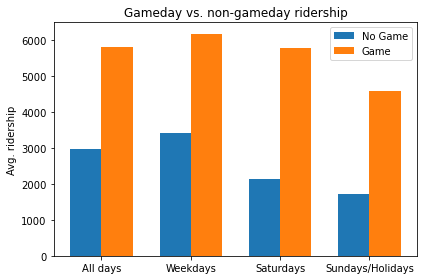

In [63]:
labels = ['All days', 'Weekdays', 'Saturdays', 'Sundays/Holidays']
nongameday_means = [non_gameday_mean, weekday_nongameday_mean, saturday_nongameday_mean, sundayholiday_nongameday_mean]
gameday_means = [gameday_mean, weekday_gameday_mean, saturday_gameday_mean, sundayholiday_gameday_mean]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nongameday_means, width, label='No Game')
rects2 = ax.bar(x + width/2, gameday_means, width, label='Game')

ax.set_ylabel('Avg. ridership')
ax.set_title('Gameday vs. non-gameday ridership')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

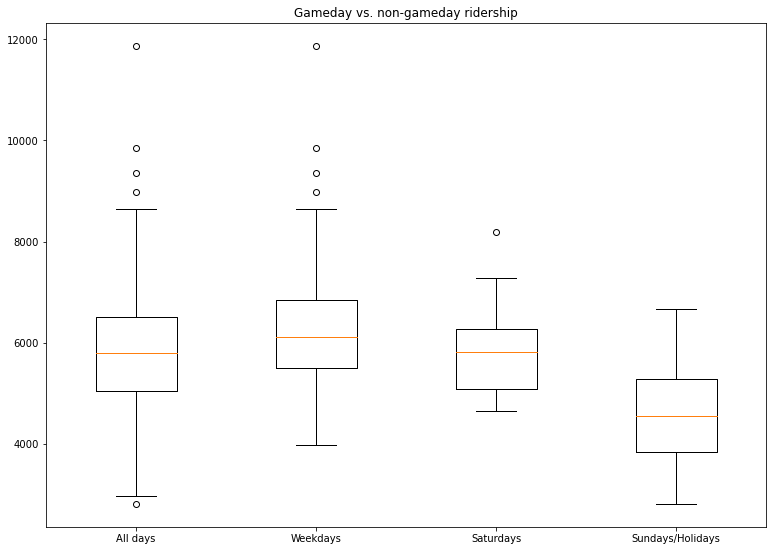

In [71]:
data_1 = game_day_df['rides']
data_2 = game_day_df.loc[game_day_df['daytype'] == 'W', 'rides']
data_3 = game_day_df.loc[game_day_df['daytype'] == 'A', 'rides']
data_4 = game_day_df.loc[game_day_df['daytype'] == 'U', 'rides']
data = [data_1, data_2, data_3, data_4] 
  
fig = plt.figure(figsize =(10, 7)) 
  
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_title('Gameday vs. non-gameday ridership')
  
bp = ax.boxplot(data, labels=labels) 
  
plt.show() 